In [30]:
# importing necessary packages 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [42]:
# imoprting the dataset
data = pd.read_csv("Company_Data.csv")

In [43]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [45]:
# descriptive Statastics
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [46]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [47]:
# creating a copy of data
data1 = data.copy()

In [48]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [49]:
data1['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [50]:
data1['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

# one_hot encoding

In [51]:
data1['US'] = data1['US'].map({'Yes':1,'No': 0})

In [52]:
data1['Urban'] = data1['Urban'].map({'Yes':1,'No': 0})

In [53]:
data1['ShelveLoc'] = data1['ShelveLoc'].map({'Bad':0,'Good':2,'Medium':1})

In [54]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [55]:
# changing target variable to catogerical data
data1["sales"]="small"
data1.loc[data1["Sales"]>7.49,"sales"]="large"
data1.drop(["Sales"],axis=1,inplace=True)

In [56]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,large
1,111,48,16,260,83,2,65,10,1,1,large
2,113,35,10,269,80,1,59,12,1,1,large
3,117,100,4,466,97,1,55,14,1,1,small
4,141,64,3,340,128,0,38,13,1,0,small


In [57]:
# input variables
x = data1.iloc[:,0:10]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [58]:
# Target variable
y = data1.iloc[:,10]
y

0      large
1      large
2      large
3      small
4      small
       ...  
395    large
396    small
397    small
398    small
399    large
Name: sales, Length: 400, dtype: object

In [59]:
# spliting the data into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 40)

In [60]:
# creating a model or model building
model = DecisionTreeClassifier(criterion='entropy',max_depth = 4) 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

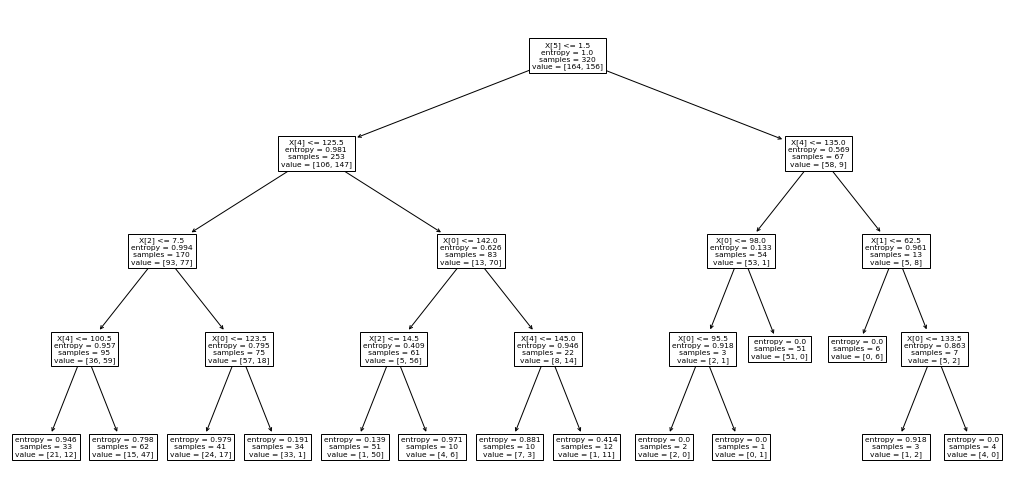

In [61]:
fig = plt.figure(figsize=(18,9))
tree.plot_tree(model)
plt.show()

In [62]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

large    45
small    35
dtype: int64

In [63]:
preds

array(['small', 'large', 'small', 'large', 'small', 'large', 'large',
       'large', 'large', 'large', 'small', 'small', 'large', 'large',
       'large', 'large', 'large', 'large', 'small', 'small', 'large',
       'large', 'small', 'large', 'small', 'small', 'large', 'small',
       'large', 'large', 'large', 'large', 'large', 'small', 'large',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'large', 'large', 'large', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'small', 'large',
       'large', 'large', 'large', 'small', 'small', 'large', 'large',
       'small', 'small', 'large', 'large', 'small', 'small', 'large',
       'large', 'large', 'large', 'small', 'large', 'large', 'small',
       'small', 'small', 'large'], dtype=object)

In [64]:
pd.crosstab(y_test,preds)

col_0,large,small
sales,,
large,29,6
small,16,29


In [65]:
np.mean(preds==y_test)*100

72.5

In [66]:
df_t = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_t

,Actual,Predicted
132,large,small
390,small,large
310,large,small
3,small,large
248,small,small
...,...,...
361,large,large
197,small,small
23,small,small
54,small,small


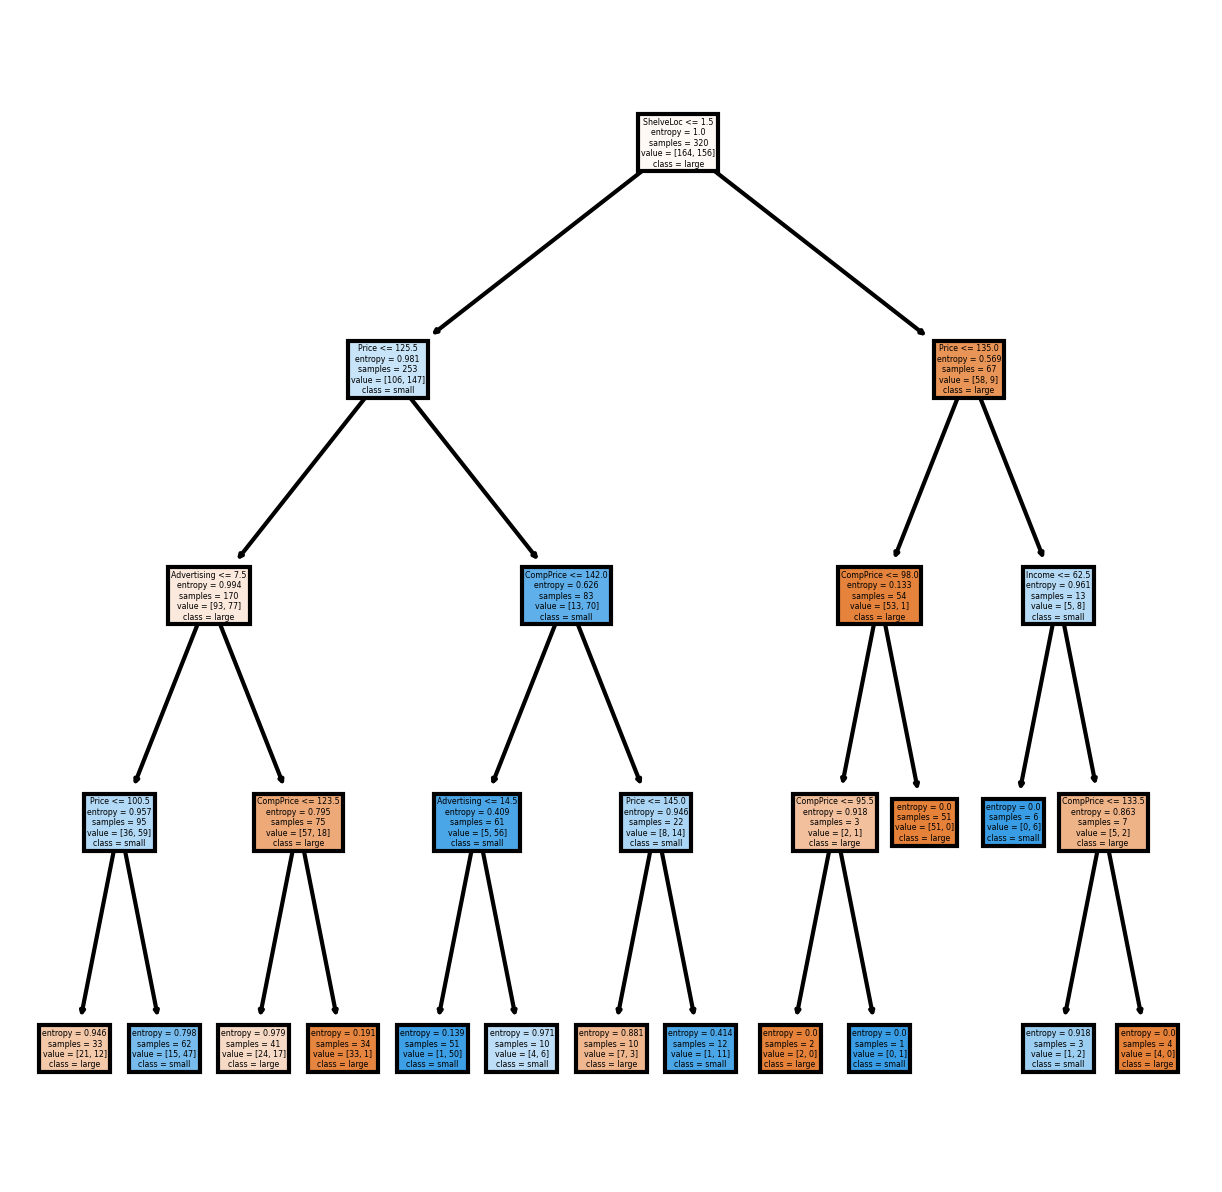

In [67]:
fn=['CompPrice','Income','Advertising' ,'Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['large','small']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [71]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
confusion_matrix = confusion_matrix(y_test,preds)
print(confusion_matrix)

[[29  6]
 [16 29]]


In [73]:
report = classification_report(y_test,preds)
print(report)

              precision    recall  f1-score   support

       large       0.64      0.83      0.73        35
       small       0.83      0.64      0.73        45

    accuracy                           0.73        80
   macro avg       0.74      0.74      0.73        80
weighted avg       0.75      0.73      0.73        80



In [75]:
accuracy_score(y_test,preds)*100

72.5

In [ ]:
model.feature_importances_

In [29]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
4,Price,0.233921
0,CompPrice,0.181133
1,Income,0.148966
2,Advertising,0.122052
6,Age,0.117364
5,ShelveLoc,0.104841
7,Education,0.038264
3,Population,0.028350
9,US,0.016497
8,Urban,0.008613


## as seen in the above table "Price" is the most important feature